# A Walkthrough of *Exact Stochastic Simulation of Coupled Chemical Reactions* By Danlel T. Gillespie

## Part 4 - Lotka Reactions

### Learning Goals of Part 4

In this seciton the Gillespie algorithm will be imported as a Python module. 
Lotka Reactions will be explored, a simple model of a predator-prey system.

In [1]:
from gillespie_algorithm import gillespie as gsa
import numpy as np
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

### Lotka Reaction Equations

$$
\bar{X} + Y_1 \xrightarrow{c_1} 2 Y_1
$$

$$
Y_1 + Y_2 \xrightarrow{c_2} 2 Y_2
$$

$$
Y_2 \xrightarrow{c_3} Z
$$

In [2]:
# Define a list of Y_# values that will be tracked.
# These numbers are their starting values.
# Y_1, Y_2
species = [1000, 1000]

rates = [10., 0.01, 10]

# Define the changes.
species_change = {1: lambda j: [j[0] + 1, j[1]],
                  2: lambda j: [j[0] - 1, j[1] + 1],
                  3: lambda j: [j[0],     j[1] - 1]}

# Define the functions that return the number of available combinations
# for a given reaction. The input for these lambda functions are the
# species list defined above.
avail_rxn = {1: lambda k: k[0],
             2: lambda k: k[0] * k[1],
             3: lambda k: k[1]}

In [3]:
time, s_list = gsa(species, rates, species_change, avail_rxn, 30, 10000).simulate()

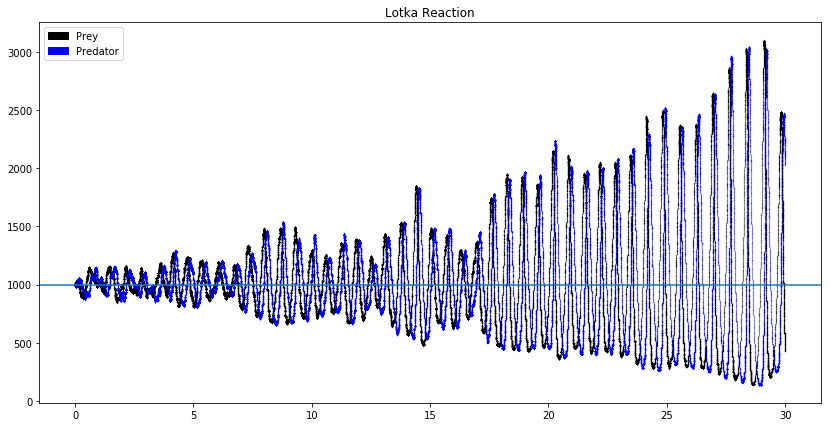

In [5]:
# Prepare the figure.
plt.figure(1, figsize=(14,7))
plt.title('Lotka Reaction')

# Add the desired data to the plot.
plt.scatter(time, [x[0] for x in s_list], marker='.', s=0.1, alpha=0.1, color='k')
plt.scatter(time, [x[1] for x in s_list], marker='.', s=0.1, alpha=0.1, color='b')

# Add a horizontal marker line.
plt.axhline(y=1000)

# Prepare color swatches for the legend.
# This is required, as otherwise the individual markers are too hard to see.
black_patch = mpatches.Patch(color='black', label='Prey')
blue_patch = mpatches.Patch(color='blue', label='Predator')
plt.legend(handles=[black_patch, blue_patch])

# Show the plot.
plt.show()

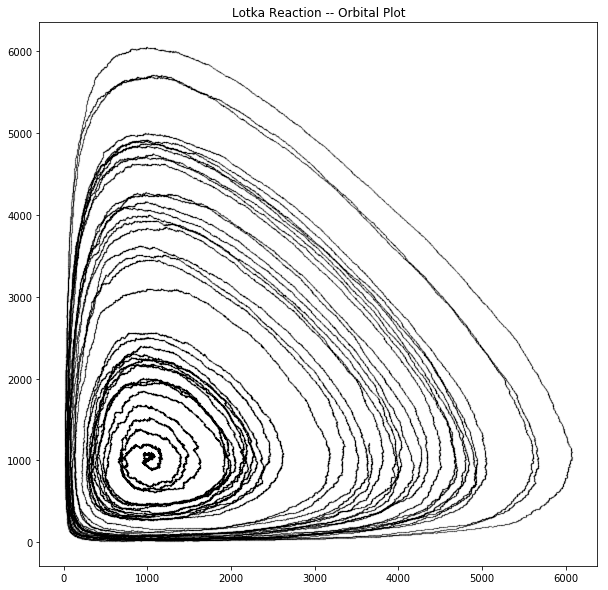

In [11]:
# Orbital Plot
plt.figure(figsize=(10, 10))
plt.title('Lotka Reaction -- Orbital Plot')

plt.scatter([x[0] for x in s_list], [x[1] for x in s_list], marker='.', s=0.1, alpha=0.1, color='k')


# Show the plot.
plt.show()